## Tutorial 8, Question 3

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

import os
if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

creating the figures folder


In [2]:
seed = 10
np.random.seed(seed)
torch.manual_seed(seed)

In [3]:
class SeriesPredictor(nn.Module):

    def __init__(self, input_dim, seq_size, hidden_dim=10):
        super(SeriesPredictor, self).__init__()
        self.rnn = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.linear(out).squeeze(-1)
        return out

In [4]:
# Training function
def train_step(model, x, target, optimizer, criterion):
    optimizer.zero_grad()
    out = model(x)
    loss = criterion(out, target)
    loss.backward()
    optimizer.step()
    return loss.item()

num_iters = 1000
predictor = SeriesPredictor(input_dim=1, seq_size=4, hidden_dim=10)
optimizer = optim.Adam(predictor.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [5]:
train_x = torch.tensor(
    [[[1], [2], [5], [6]],
    [[5], [7], [7], [8]],
    [[3], [4], [5], [7]]], dtype=torch.float32)
train_y = torch.tensor(
    [[1, 3, 7, 11],
    [5, 12, 14, 15],
    [3, 7, 9, 12]], dtype=torch.float32)

In [6]:
errors = []
for i in range(num_iters):
    loss = train_step(predictor, train_x, train_y, optimizer, criterion)
    errors.append(loss)
    if i % 100 == 0:
        print('iteration: %d, mse_loss: %f'%(i, loss))

iteration: 0, mse_loss: 80.634087
iteration: 100, mse_loss: 60.111523
iteration: 200, mse_loss: 42.985504
iteration: 300, mse_loss: 32.003231
iteration: 400, mse_loss: 24.490614
iteration: 500, mse_loss: 19.146248
iteration: 600, mse_loss: 15.038371
iteration: 700, mse_loss: 11.671241
iteration: 800, mse_loss: 9.155931
iteration: 900, mse_loss: 7.284585


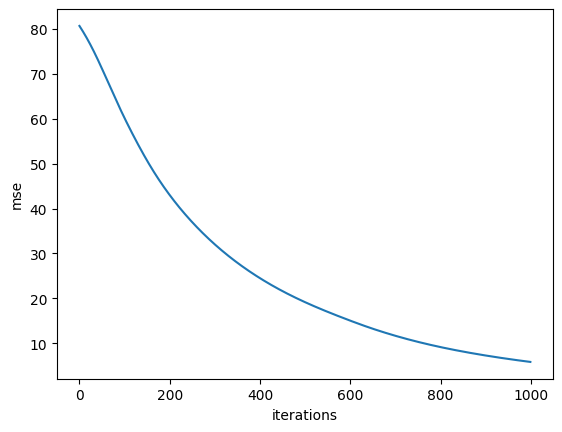

tensor([[0.9988, 2.7404, 6.3064, 8.8883],
        [4.6289, 8.4632, 9.4166, 9.5583]], grad_fn=<SqueezeBackward1>)


In [7]:
plt.figure()
plt.plot(range(num_iters), errors)
plt.xlabel('iterations')
plt.ylabel('mse')
plt.savefig('./figures/t9q1_1.png')

test_x = torch.tensor(
    [[[1], [2], [3], [4]],  # 1, 3, 5, 7
    [[4], [5], [6], [7]]], dtype=torch.float32)  # 4, 9, 11, 13
out = predictor(test_x)
print(out)

plt.show()